In [1]:
import pandas as pd
import ast 
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [5]:
def get_column_info(series, keys):
    '''
    Allows returned column to replacd the relevant df column in place
    or as a new Series. Allows for further counting with the gather function.
    
    Parameters:
    series (pd.Series) The relevant column from the DataFrame.
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    column (pd.Series) Each row has a new dict with lists of values associated 
    with each given key.
    '''
    column = copy.deepcopy(series)
    for index, data in column.iteritems():
        #Populate this row of the new df with the new dict
        #Calls the get_info method
        column.at[index] = get_info(data, keys)
    return column

def get_info(row, keys):
    '''
    Pulls the values from each key into a new list for each key.
    
    Parameters:
    row (str) String to be evaluated as list of dicts.
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    info (dict) The values of the relevant keys as new lists.
    '''
    #if the data can be turned into a list or dict
    if row != '':
        #New empty dict of lists
        info = {}
        #For each of the provided keys 
        for key in keys:
            #
            info[key] = []
            #Turn data into list of dicts
            list_of_dicts = ast.literal_eval(row)
            #Read each dict
            for dic in list_of_dicts:
                #Add the info from the provided key to the list of info
                info[key].append(dic[key])
        #Return the list of info matching the key from every row
        return info

def gather(column, keys):
    '''
    Gathers up all values sassociated with each key across all rows
    in the column into a single list. Each list is added to a new dict.
    
    Parameters:
    column (pd.Series) Column of rows to iterate over.
    
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    info_lists (dict) Dictionaries of lists of values associated with each key.
    '''
    #New dict of lists
    info_lists = {}
    
    #New empty list for each key in keys
    for key in keys:
        info_lists[key] = [] 
    
    #Iterate over each key in the list. Allows for one or several keys.
    for index, data in column.iteritems():
        for key in keys:
            #If row isn't blank
            if data:
                #Add the values to the list for that key
                info_lists[key].extend(data[key])
    
    return info_lists


def draw_heat_map(df, title):
    '''
    Function to draw a heat map to show collinearity among features.
    Uses seaborn's "corr" object and "mask" and "cmap"
    '''
    
    sns.set(style="white")
    corr = df.corr() # Create a covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool) #a mask the size of the matrix
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8)) # Set up the matplotlib figure
    ax.set_title(title, fontdict={'fontsize': 'large'})
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #custom diverging colormap
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, #Draw the heatmap
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

def best_features(df, target, threshold):
    '''
    A tool to get the best features from a correlation matrix
    according to some threshold.
    '''
    
    #A correlation matrix object with scores for the relationship between
    #target and features
    corr = df.corr()
    
    #Only keep the features that meet the threshold when
    #absolute value is taken. (Can be strong neg or pos relationship.)
    corr_to_keep = corr[np.abs(corr[target]) > threshold]
    
    #List of features with strong enough relationships to target
    features_to_keep = list(corr_to_keep.index)

    #Drop the target so it doesn't get double listed
    features_to_keep.remove(target)
    
    return features_to_keep

# Exploring dictionaries

In [6]:
#This column only has 1 relevant key but several relevant values attached to that key.
train['genres'][1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [7]:
#Some of these columns have relevant info in more than one key.
#i.e. 'cast' has relevant info in the 'character' and 'name' keys.
train['cast'][0][:400]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, "

# 'Belongs to Collection'

In [8]:
belongs_to_collection = get_column_info(train['belongs_to_collection'].fillna(''), ['name'])
#Only 600 films are in collections
belongs_to_collection.notna().sum()

604

In [9]:
train['belongs_to_collection'] = [1 if row else None for row in belongs_to_collection] #divide this series as 1 if in a collection or 0 if not

In [10]:
train.belongs_to_collection.fillna(0, inplace = True)

In [11]:
train.belongs_to_collection = train.belongs_to_collection.astype(int)

In [12]:
train.belongs_to_collection.head()


0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int64

### Do the same to test 


In [13]:
b_t_c = get_column_info(test['belongs_to_collection'].fillna(''), ['name'])

In [14]:
b_t_c.notna().sum() #877 films in collection 

877

In [15]:
test['b_t_c'] = [1 if row else None for row in b_t_c] #divide this series as 1 if in a collection or 0 if not

In [16]:
test.b_t_c.fillna(0, inplace = True)

In [17]:
test.b_t_c = test.b_t_c.astype(int)

In [18]:
test.b_t_c.head() #check

0    1
1    0
2    0
3    0
4    0
Name: b_t_c, dtype: int64

# Best Features from Keywords

In [86]:
draw_heat_map(pd.concat([train['revenue'], train[keyword_list]], axis = 1), 'Revenue and Keyword')

KeyError: "None of [Index(['woman director', 'independent film', 'duringcreditsstinger', 'murder',\n       'based on novel', 'violence', 'sport', 'biography',\n       'aftercreditsstinger', 'dystopia', 'revenge', 'friendship', 'sex',\n       'suspense', 'sequel', 'police', 'love', 'teenager', 'nudity',\n       'female nudity', 'drug', 'prison', 'musical', 'high school',\n       'los angeles', 'new york', 'family', 'father son relationship',\n       'investigation', 'kidnapping', '3d', 'wedding'],\n      dtype='object')] are in the [columns]"

In [20]:
language_counts #over half of the films represented are in English with the next highest representation in French, dropping this column because there aren't enough observations of languages other than in English

English             0.600872
Français            0.066101
Español             0.054854
Deutsch             0.038788
Pусский             0.034886
Italiano            0.028460
日本語                 0.020427
普通话                 0.015607
हिन्दी              0.012853
                    0.010787
Português           0.009869
العربية             0.009181
한국어/조선말             0.008492
广州话 / 廣州話           0.008263
தமிழ்               0.006197
Polski              0.005738
Magyar              0.005508
Latin               0.005279
svenska             0.005049
ภาษาไทย             0.005049
Český               0.004590
עִבְרִית            0.003443
ελληνικά            0.003443
Dansk               0.002984
Türkçe              0.002984
Tiếng Việt          0.002295
Nederlands          0.002295
فارسی               0.002295
اردو                0.001836
Română              0.001836
తెలుగు              0.001607
Norsk               0.001607
No Language         0.001607
Kiswahili           0.001607
Український   

In [21]:
train.original_language.value_counts(normalize = True) #over half of the films represented are in English, dropping this column because there aren't enough observations of languages other than in English

en    0.858333
fr    0.026000
ru    0.015667
es    0.014333
hi    0.014000
ja    0.012333
it    0.008000
ko    0.006667
cn    0.006667
zh    0.006333
de    0.006000
ta    0.005333
sv    0.002667
pt    0.002000
nl    0.002000
fa    0.001667
da    0.001667
ro    0.001333
hu    0.001000
tr    0.001000
pl    0.000667
fi    0.000667
no    0.000667
ml    0.000667
te    0.000667
id    0.000333
vi    0.000333
ur    0.000333
mr    0.000333
el    0.000333
bn    0.000333
sr    0.000333
ar    0.000333
cs    0.000333
he    0.000333
nb    0.000333
Name: original_language, dtype: float64

In [22]:
train.drop(['original_language', 'spoken_languages'], axis = 1, inplace = True)

In [23]:
test.drop(['original_language', 'spoken_languages'], axis = 1, inplace = True)

# Genres

In [24]:
genres = get_column_info(train['genres'].fillna(''), ['name'])
genre_counts = pd.Series(gather(genres, ['name'])['name']).value_counts()

#Some movies have up to 7 genres
genre_lengths = [len(row['name']) for row in genres[genres.notna()]]
set(genre_lengths)

#Replace value of genres column with list of genres for each movie
train['genres'] = [row['name'] if row else None for row in genres]

#Fill nulls
train['genres'].fillna('None', inplace = True)

#Because some movies have more than one genre, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#Get list of genres to make new columns
genre_list = list(genre_counts.index)

#Create a new  column for each genre
#'True' if genre appears in list of genres for each movie
for genre in genre_list:
    train[genre] = [1 if genre in row else 0 for row in train['genres']]

#No longer need the 'genres' column, and 'TV Movie' only has 1 value
train.drop(['genres', 'TV Movie'], axis = 1, inplace= True)

#Remove 'tv movie' from genre_list
genre_list.remove('TV Movie')

### Same for Test set


In [25]:
g = get_column_info(test['genres'].fillna(''), ['name'])
g_c = pd.Series(gather(g, ['name'])['name']).value_counts()

#Some movies have up to 7 genres
g_l = [len(row['name']) for row in g[g.notna()]]
set(genre_lengths)

#Replace value of genres column with list of genres for each movie
test['genres'] = [row['name'] if row else None for row in g]

#Fill nulls
test['genres'].fillna('None', inplace = True)

#Because some movies have more than one genre, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#Get list of genres to make new columns
g_list = list(g_c.index)

#Create a new  column for each genre
#'True' if genre appears in list of genres for each movie
for g in g_list:
    test[g] = [1 if g in row else 0 for row in test['genres']]

#No longer need the 'genres'
test.drop(['genres'], axis = 1, inplace= True)






# 'Production Companies'

In [26]:

production_companies = get_column_info(train['production_companies'].fillna(''), ['name'])
company_counts = pd.Series(gather(production_companies, ['name'])['name']).value_counts()

prodcom_lengths = [len(row['name']) for row in production_companies[production_companies.notna()]]
#Some films have up to 17 production companies(!)
set(prodcom_lengths)

#Replace value of prod com column with list of prodcoms for each row
train['production_companies'] = [row['name'] if row else None for row in production_companies]

#Fill nulls
train['production_companies'].fillna('None', inplace = True)

#Because some movies have more than one production company, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of production companies that appear in more than 14 films
prodcom_list = list(company_counts[company_counts > 14].index)

#Create a new  column for each prodcom
#'True' if prodcom appears in list of prodcoms for each movie
for prodcom in prodcom_list:
    train[prodcom] = [1 if prodcom in row else 0 for row in train['production_companies']]

#Drop the original row
train.drop(['production_companies'], axis = 1, inplace = True)

### Same for test set

In [27]:
p_companies = get_column_info(test['production_companies'].fillna(''), ['name'])
c_counts = pd.Series(gather(p_companies, ['name'])['name']).value_counts()

prodcom_l = [len(row['name']) for row in p_companies[p_companies.notna()]]
#Some films have up to 17 production companies(!)
set(prodcom_l)

#Replace value of prod com column with list of prodcoms for each row
test['production_companies'] = [row['name'] if row else None for row in p_companies]

#Fill nulls
test['production_companies'].fillna('None', inplace = True)

#Because some movies have more than one production company, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of production companies that appear in more than 14 films
prodcom_l = list(c_counts[c_counts > 14].index)

#Create a new  column for each prodcom
#'True' if prodcom appears in list of prodcoms for each movie
for prodcom in prodcom_l:
    test[prodcom] = [1 if prodcom in row else 0 for row in test['production_companies']]

#Drop the original row
test.drop(['production_companies'], axis = 1, inplace = True)
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'homepage', 'imdb_id',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries',
       ...
       'Happy Madison Productions', 'Studio Canal', 'Jerry Bruckheimer Films',
       'Téléfilm Canada', 'Ingenious Film Partners', 'Epsilon Motion Pictures',
       'Studio Babelsberg', 'IM Global', 'Intermedia Films',
       'Arte France Cinéma'],
      dtype='object', length=114)

# 'Production Countries'

In [28]:

production_countries = get_column_info(train['production_countries'].fillna(''), ['name'])
country_counts = pd.Series(gather(production_countries, ['name'])['name']).value_counts()

country_lengths = [len(row['name']) for row in production_countries if row]
#Some films have up to 8 production countries
set(country_lengths)

#Replace value of country column with list of countries for each row
train['production_countries'] = [row['name'] if row else None for row in production_countries]

#Fill nulls
train['production_countries'].fillna('None', inplace = True)

#Because some movies have more than one production country, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of countries appearing most often
country_list = list(country_counts[:25].index)

#Create a new column for each country
#'True' if country appears in list of countries for each movie
for country in country_list:
    train[country] = [1 if country in row else 0 for row in train['production_countries']]
    
#Drop the original column
train.drop(['production_countries'], axis = 1, inplace = True)

### Same for Production Countries

In [29]:
p_countries = get_column_info(test['production_countries'].fillna(''), ['name'])
c_counts = pd.Series(gather(p_countries, ['name'])['name']).value_counts()

c_lengths = [len(row['name']) for row in p_countries if row]
#Some films have up to 8 production countries
set(c_lengths)

#Replace value of country column with list of countries for each row
test['production_countries'] = [row['name'] if row else None for row in p_countries]

#Fill nulls
test['production_countries'].fillna('None', inplace = True)

#Because some movies have more than one production country, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of countries appearing most often
c_list = list(c_counts[:25].index)

#Create a new column for each country
#'True' if country appears in list of countries for each movie
for country in c_list:
    test[country] = [1 if country in row else 0 for row in test['production_countries']]
    
#Drop the original column
test.drop(['production_countries'], axis = 1, inplace = True)

# Keywords

In [30]:
keywords = get_column_info(train['Keywords'].fillna(''), ['name'])
keyword_counts = pd.Series(gather(keywords, ['name'])['name']).value_counts()

keyword_lengths = [len(row['name']) for row in keywords[keywords.notna()]]
#Some films have up to 149 keywords!
set(keyword_lengths)

#Replace value of keyword column with list of keywords for each row
train['Keywords'] = [row['name'] if row else None for row in keywords]

#Fill nulls
train['Keywords'].fillna('None', inplace = True)

#Because some movies have more than one key word, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of keywords appearing most often
keyword_list = list(keyword_counts[keyword_counts >= 40].index)

#Create a new column for each key word
#'True' if key word appears in list of countries for each movie
for keyword in keyword_list:
    train['keyword'] = [1 if keyword in row else 0 for row in train['Keywords']]

#Drop the original column
train.drop(['Keywords'], axis = 1, inplace = True)

### Same to test

In [31]:

k = get_column_info(test['Keywords'].fillna(''), ['name'])
k_counts = pd.Series(gather(k, ['name'])['name']).value_counts()

k_lengths = [len(row['name']) for row in k[k.notna()]]
set(k_lengths)

#Replace value of keyword column with list of keywords for each row
test['Keywords'] = [row['name'] if row else None for row in k]

#Fill nulls
test['Keywords'].fillna('None', inplace = True)

#Because some movies have more than one key word, dummy columns cannot 
#be easily generated with pandas. Need to build and populate them
#manually.

#List of keywords appearing most often
k_list = list(k_counts[k_counts >= 40].index)

#Create a new column for each key word
#'True' if key word appears in list of countries for each movie
for keyword in k_list:
    test['keyword'] = [1 if keyword in row else 0 for row in test['Keywords']]

#Drop the original column
test.drop(['Keywords'], axis = 1, inplace = True)

# Cast

In [32]:
#Cast contains both actors and characters for each film.
cast = get_column_info(train['cast'].fillna(''), ['character', 'name'])
actor_counts = pd.Series(gather(cast, ['name'])['name']).value_counts()
#Too many different characters for this to be useful. Was good to see it though.
character_counts = pd.Series(gather(cast, ['character'])['character']).value_counts()

actor_lengths = [len(row['name']) for row in cast[cast.notna()]]
#Films have between 0 and 156 actors
set(actor_lengths)

#Make new column for list of actors in each film
train['actors'] = [row['name'] if row else None for row in cast]

#Fill nulls
train['actors'].fillna('None', inplace = True)

#Most movies have many actors so dummy columns cannot be easily
#generated with pandas. Need to build and populate them manually.

#List of biggest stars
actor_list = list(actor_counts[:40].index)

#Create a new column for each actor
#'True' if actor appears in list of actors for each movie
for actor in actor_list:
    train[actor] = [1 if actor in row else 0 for row in train['actors']]
    
#Drop original column. Keeping 'actors' for now for use with 'stars' later.
train.drop(['cast'], axis = 1, inplace = True)

### Same to Test Set


In [33]:
#Cast contains both actors and characters for each film.
c = get_column_info(test['cast'].fillna(''), ['character', 'name'])
a_counts = pd.Series(gather(c, ['name'])['name']).value_counts()
#Too many different characters for this to be useful. Was good to see it though.
c_counts = pd.Series(gather(c, ['character'])['character']).value_counts()

a_lengths = [len(row['name']) for row in c[c.notna()]]
#Films have between 0 and 156 actors
set(a_lengths)

#Make new column for list of actors in each film
test['actors'] = [row['name'] if row else None for row in c]

#Fill nulls
test['actors'].fillna('None', inplace = True)

#Most movies have many actors so dummy columns cannot be easily
#generated with pandas. Need to build and populate them manually.

#List of biggest stars
a_list = list(a_counts[:40].index)

#Create a new column for each actor
#'True' if actor appears in list of actors for each movie
for actor in a_list:
    test[actor] = [1 if actor in row else 0 for row in test['actors']]
    
#Drop original column. Keeping 'actors' for now for use with 'stars' later.
test.drop(['cast'], axis = 1, inplace = True)

# Release dates

In [34]:
train.release_date.head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

## Obviously, exact dates won't make any real predictions but what if we make predictions based on release-day-ofweek, release-month, and release-year

In [35]:
train.release_date = pd.to_datetime(train['release_date'])
train['release_day'] = [row.dayofweek for row in train['release_date']]
train['release_month']  =  [row.month for row in train['release_date']]
train['release_year'] = [row.year for row in train['release_date']]
train.drop(['release_date'], axis = 1, inplace = True)

### Do the same to test set

In [36]:

test.release_date = pd.to_datetime(test['release_date'])
test['release_day'] = [row.dayofweek for row in test['release_date']]
test['release_month']  =  [row.month for row in test['release_date']]
test['release_year'] = [row.year for row in test['release_date']]
test.drop(['release_date'], axis = 1, inplace = True)


# 'Homepage'

In [37]:
train.homepage.isna().sum() #2000 movies don't have homepages

2054

In [38]:
train.homepage.head() # let's classify a movie as either having a homepage or not having one

0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
3           http://kahaanithefilm.com/
4                                  NaN
Name: homepage, dtype: object

In [39]:
train.homepage.fillna(0, inplace = True)
train.loc[train['homepage'] != 0, 'homepage'] = 1
train.homepage.head()

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int64

### Same to test set

In [40]:
test.homepage.head()

0    http://www.pokemon.com/us/movies/movie-pokemon...
1                                                  NaN
2                                                  NaN
3               http://www.sonyclassics.com/incendies/
4                                                  NaN
Name: homepage, dtype: object

In [41]:
test.homepage.fillna(0, inplace = True)

test.loc[test['homepage'] != 0, 'homepage'] = 1
test.homepage.head()

0    1
1    0
2    0
3    1
4    0
Name: homepage, dtype: int64

# Status

In [42]:
train.status.unique()

array(['Released', 'Rumored'], dtype=object)

In [43]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

### Only 4 movies haven't been released. We can drop this feature.

In [44]:
train.drop(['status'], axis=1 ,  inplace = True)
test.drop(['status'], axis=1 ,  inplace = True)

# Crew

In [45]:
directors = []
producers = []
writer = []
## creating some arrays to hold crew members that may effect revenue

In [46]:
crew = get_column_info(train['crew'].fillna(''), ['job', 'name'])

#new column for the crew of each film as a dict
train['crew_dict'] = [dict(
                           zip(
                               row['job'], row['name']
                               )
                         ) if row else None for row in crew]

In [47]:

for i in train.crew_dict:
    try: 
        directors.append(i['Director'])
    except TypeError:
        directors.append('None')
    try:
        producers.append(i['Producer'])
    except KeyError:
        producers.append('None')
    except TypeError:
        producers.append('None')
    try:
        writer.append(i['Writer'])
    except TypeError:
        writer.append('None')
    except KeyError:
        writer.append('None')
        
    
    
        
        

   

In [48]:
train['Directors'] = directors
train['Writers'] = writer
train['Producers'] = producers
train.drop(['crew','crew_dict'], axis = 1, inplace = True)

### same for test 

In [49]:
d = []
p = []
w = []


In [50]:
cr = get_column_info(test['crew'].fillna(''), ['job', 'name'])

#new column for the crew of each film as a dict
test['crew_dict'] = [dict(
                           zip(
                               row['job'], row['name']
                               )
                         ) if row else None for row in cr]

In [51]:

for i in test.crew_dict:
    try: 
        d.append(i['Director'])
    except TypeError:
        d.append('None')
    except KeyError:
        d.append('None')
    try:
        p.append(i['Producer'])
    except KeyError:
        p.append('None')
    except TypeError:
        p.append('None')
    try:
        w.append(i['Writer'])
    except TypeError:
        w.append('None')
    except KeyError:
        w.append('None')
        

In [52]:
test['Directors'] = d
test['Writers'] = w
test['Producers'] = p

In [53]:
test.drop(['crew','crew_dict'], axis = 1, inplace = True)

In [54]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'homepage', 'imdb_id',
       'original_title', 'overview', 'popularity', 'poster_path', 'runtime',
       ...
       'Gene Hackman', 'James Franco', 'Christopher Walken', 'Brian Cox',
       'release_day', 'release_month', 'release_year', 'Directors', 'Writers',
       'Producers'],
      dtype='object', length=153)

In [55]:
train.drop(['id', 'imdb_id', 'overview', 'poster_path', 'tagline', 'original_title', 'title'], axis = 1, inplace = True)

test.drop(['id', 'imdb_id', 'overview', 'poster_path', 'tagline', 'original_title', 'title'], axis = 1, inplace = True)

## Drop columns that don't effect revenue

In [56]:
for i in train.columns:
    print(i)

belongs_to_collection
budget
homepage
popularity
runtime
revenue
Drama
Comedy
Thriller
Action
Romance
Crime
Adventure
Horror
Science Fiction
Family
Fantasy
Mystery
Animation
History
Music
War
Documentary
Western
Foreign
Warner Bros.
Universal Pictures
Paramount Pictures
Twentieth Century Fox Film Corporation
Columbia Pictures
Metro-Goldwyn-Mayer (MGM)
New Line Cinema
Touchstone Pictures
Walt Disney Pictures
Columbia Pictures Corporation
TriStar Pictures
Relativity Media
Canal+
United Artists
Miramax Films
Village Roadshow Pictures
Regency Enterprises
Dune Entertainment
Working Title Films
BBC Films
Fox Searchlight Pictures
StudioCanal
Lionsgate
DreamWorks SKG
Fox 2000 Pictures
Hollywood Pictures
Summit Entertainment
Orion Pictures
Amblin Entertainment
Dimension Films
Epsilon Motion Pictures
Focus Features
Castle Rock Entertainment
Original Film
Morgan Creek Productions
Participant Media
Legendary Pictures
Film4
New Regency Pictures
Blumhouse Productions
Spyglass Entertainment
Imagine E

In [57]:
non_categorical = train.iloc[:,:6]



In [58]:
non_categorical.drop(['belongs_to_collection','homepage'], axis = 1, inplace = True)
non_categorical['revenue'] = train.revenue

In [59]:
non_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
budget        3000 non-null int64
popularity    3000 non-null float64
runtime       2998 non-null float64
revenue       3000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 93.8 KB


In [60]:
#fill null values in runtime with mean runtime value
non_categorical.runtime = non_categorical.runtime.fillna(non_categorical.runtime.mean())
non_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
budget        3000 non-null int64
popularity    3000 non-null float64
runtime       3000 non-null float64
revenue       3000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 93.8 KB


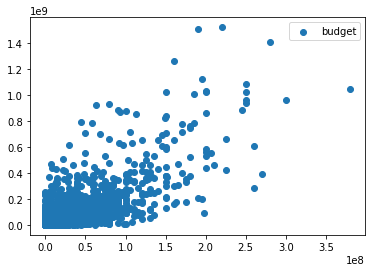

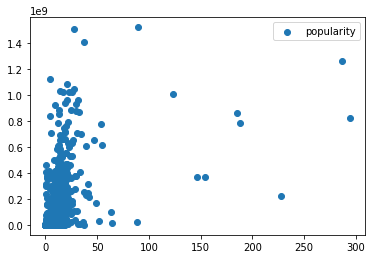

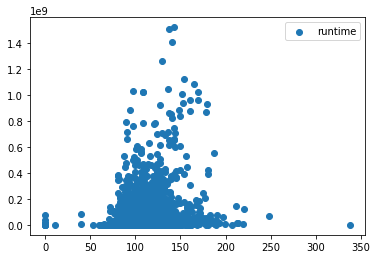

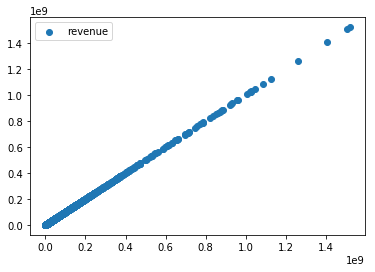

In [61]:
for x in non_categorical:
    plt.scatter(train[x], train.revenue, label = x )
    plt.legend()
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eabc550>,
      dtype=object)

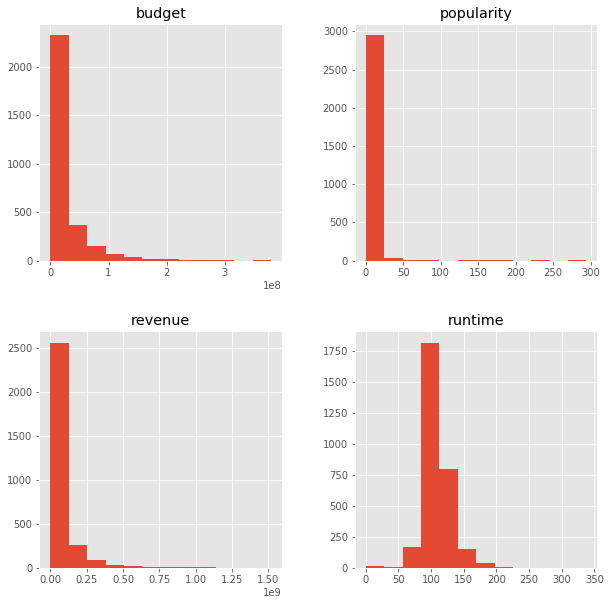

In [62]:
plt.style.use('ggplot')
non_categorical.hist(bins = 12, figsize=(10,10))

In [63]:
non_categorical = non_categorical.loc[train['runtime'] < 200]
non_categorical = non_categorical.loc[train['popularity'] < 25]
non_categorical = non_categorical.loc[train['runtime'] > 50]
non_categorical = non_categorical.loc[train['budget'] < 150000000]


##Drop the outliers and see if it helps create more linearity and homeoscedasticity

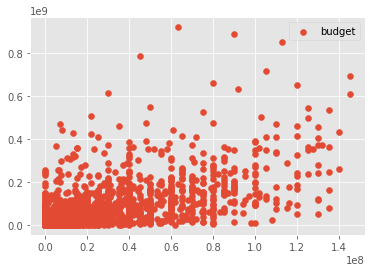

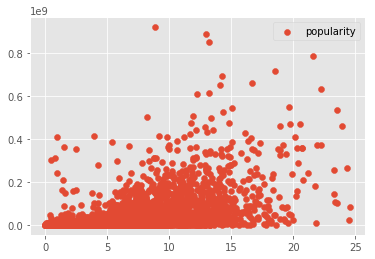

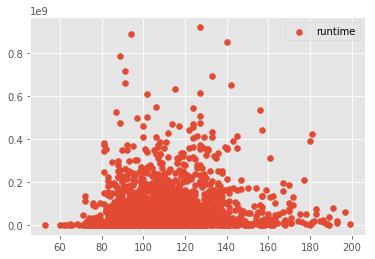

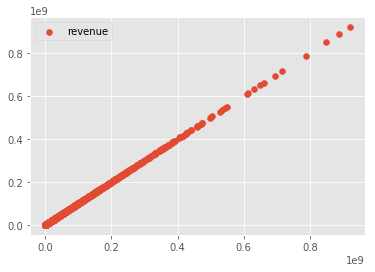

In [64]:
for x in non_categorical:
    plt.scatter(non_categorical[x], non_categorical.revenue, label = x )
    plt.legend()
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21761eb8>,
      dtype=object)

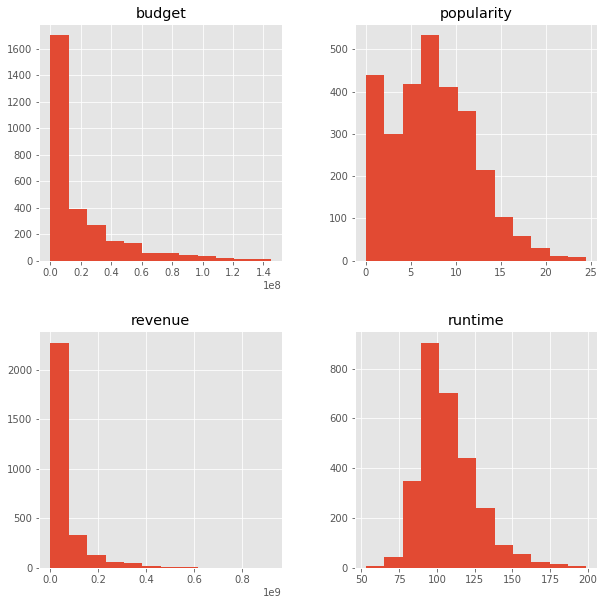

In [65]:
plt.style.use('ggplot')
non_categorical.hist(bins = 12, figsize=(10,10))


Dropping outliers helped create more homeoscedasticity and linearity within our features. Let's implement the same changes in our train and test sets.

In [66]:
train.runtime = train.runtime.fillna(train.runtime.mean())
train = train.loc[train['runtime'] < 200]
train = train.loc[train['popularity'] < 25]
train = train.loc[train['runtime'] > 50]
train = train.loc[train['budget'] < 150000000]

test.runtime = test.runtime.fillna(train.runtime.mean())
test = test.loc[test['runtime'] < 200]
test = test.loc[test['popularity'] < 25]
test = test.loc[test['runtime'] > 50]
test = test.loc[test['budget'] < 150000000]




In [67]:
for i in train.columns:
    print(i) 

belongs_to_collection
budget
homepage
popularity
runtime
revenue
Drama
Comedy
Thriller
Action
Romance
Crime
Adventure
Horror
Science Fiction
Family
Fantasy
Mystery
Animation
History
Music
War
Documentary
Western
Foreign
Warner Bros.
Universal Pictures
Paramount Pictures
Twentieth Century Fox Film Corporation
Columbia Pictures
Metro-Goldwyn-Mayer (MGM)
New Line Cinema
Touchstone Pictures
Walt Disney Pictures
Columbia Pictures Corporation
TriStar Pictures
Relativity Media
Canal+
United Artists
Miramax Films
Village Roadshow Pictures
Regency Enterprises
Dune Entertainment
Working Title Films
BBC Films
Fox Searchlight Pictures
StudioCanal
Lionsgate
DreamWorks SKG
Fox 2000 Pictures
Hollywood Pictures
Summit Entertainment
Orion Pictures
Amblin Entertainment
Dimension Films
Epsilon Motion Pictures
Focus Features
Castle Rock Entertainment
Original Film
Morgan Creek Productions
Participant Media
Legendary Pictures
Film4
New Regency Pictures
Blumhouse Productions
Spyglass Entertainment
Imagine E

In [68]:
gen_rev = train.iloc[:,5:25]
gen_rev.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 2999
Data columns (total 20 columns):
revenue            2881 non-null int64
Drama              2881 non-null int64
Comedy             2881 non-null int64
Thriller           2881 non-null int64
Action             2881 non-null int64
Romance            2881 non-null int64
Crime              2881 non-null int64
Adventure          2881 non-null int64
Horror             2881 non-null int64
Science Fiction    2881 non-null int64
Family             2881 non-null int64
Fantasy            2881 non-null int64
Mystery            2881 non-null int64
Animation          2881 non-null int64
History            2881 non-null int64
Music              2881 non-null int64
War                2881 non-null int64
Documentary        2881 non-null int64
Western            2881 non-null int64
Foreign            2881 non-null int64
dtypes: int64(20)
memory usage: 472.7 KB


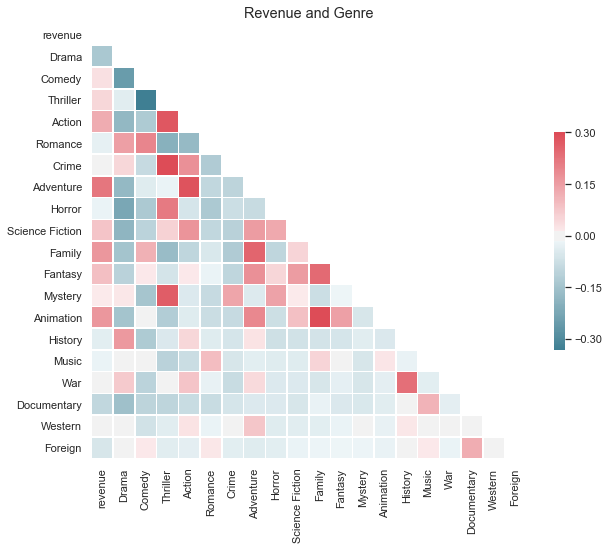

In [69]:
draw_heat_map(gen_rev, 'Revenue and Genre')

Lots of collinearity among these features.

History and war have little relationship to revenue and can be dropped. Comedy, romance, horror, music, and western have only slight relationships with revenue.

Drama has strong negative relationship with other features. Thriller is highly correlated with action, crime, and mystery. FOreign is correlated to documentary.

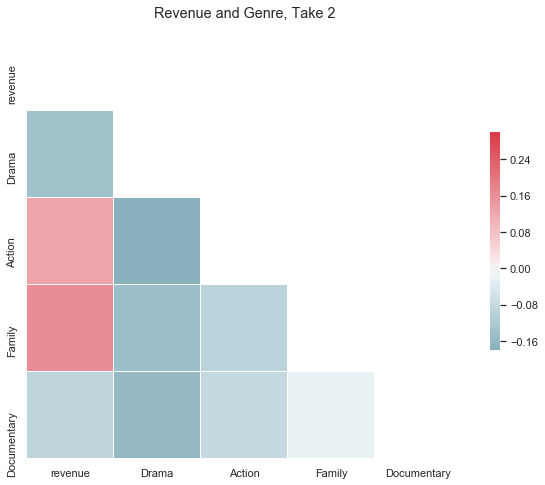

In [70]:

genres_to_drop = ['Comedy', 'Romance', 'Horror', 'History', 'War', 'Music', 
                  'Western', 'Crime', 'Thriller', 'Foreign', 'Adventure', 
                  'Animation', 'Fantasy', 'Science Fiction', 'Mystery']

genres_to_keep = [x for x in genre_list if x not in genres_to_drop]

draw_heat_map(pd.concat([train['revenue'], train[genres_to_keep]], axis = 1), 'Revenue and Genre, Take 2')

Those with a strong relationship to price also have a strong relationship to each other. Can be dropped.

In [71]:
len(prodcom_list)

48

In [77]:
prodcom_rev = train.iloc[:,25:73]
prodcom_rev['revenue'] = train.revenue

In [78]:
prodcom_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 2999
Data columns (total 49 columns):
Warner Bros.                              2881 non-null int64
Universal Pictures                        2881 non-null int64
Paramount Pictures                        2881 non-null int64
Twentieth Century Fox Film Corporation    2881 non-null int64
Columbia Pictures                         2881 non-null int64
Metro-Goldwyn-Mayer (MGM)                 2881 non-null int64
New Line Cinema                           2881 non-null int64
Touchstone Pictures                       2881 non-null int64
Walt Disney Pictures                      2881 non-null int64
Columbia Pictures Corporation             2881 non-null int64
TriStar Pictures                          2881 non-null int64
Relativity Media                          2881 non-null int64
Canal+                                    2881 non-null int64
United Artists                            2881 non-null int64
Miramax Films            

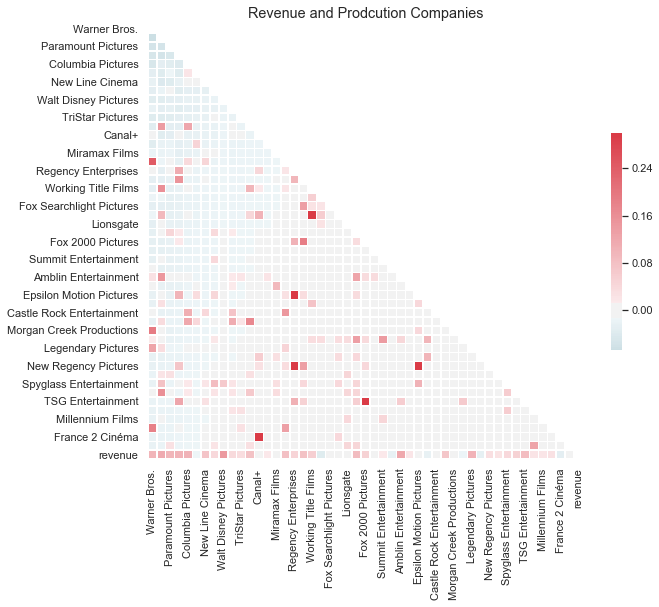

In [79]:
draw_heat_map(prodcom_rev, 'Revenue and Prodcution Companies')

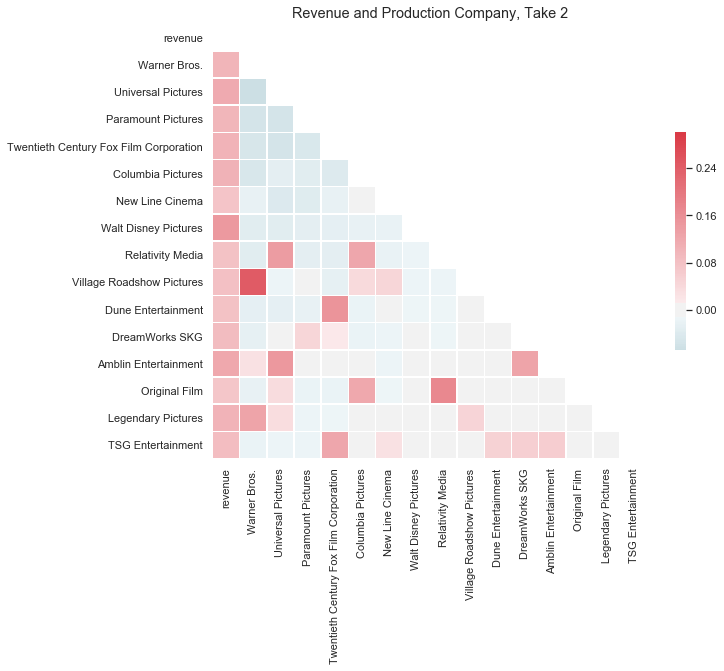

In [81]:
prodcoms_to_keep = best_features(pd.concat([train['revenue'], train[prodcom_list]], axis = 1),
                                'revenue', 0.07)

draw_heat_map(pd.concat([train['revenue'], train[prodcoms_to_keep]], axis = 1), 
              'Revenue and Production Company, Take 2')

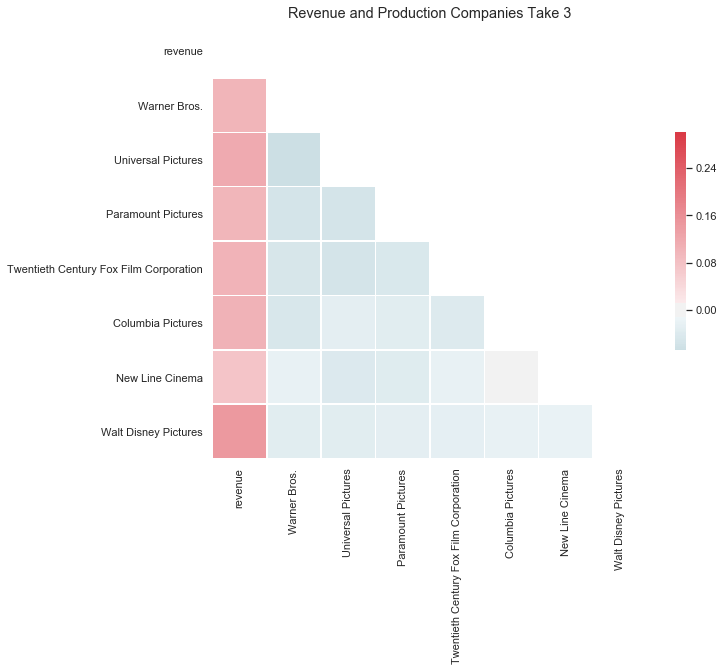

In [82]:

#Now the multi-collinearity between features is clearly visible.
prodcoms_to_drop = ['Village Roadshow Pictures', 'Dune Entertainment', 
                    'TSG Entertainment', 'Original Film', 'Amblin Entertainment', 
                    'Relativity Media', 'Legendary Pictures', 'DreamWorks SKG']

prodcoms_to_keep = [x for x in prodcoms_to_keep if x not in prodcoms_to_drop]

draw_heat_map(pd.concat([train['revenue'], train[prodcoms_to_keep]], axis = 1), 'Revenue and Production Companies Take 3')

A nice set of features to keep.

# Best Features from Production Country

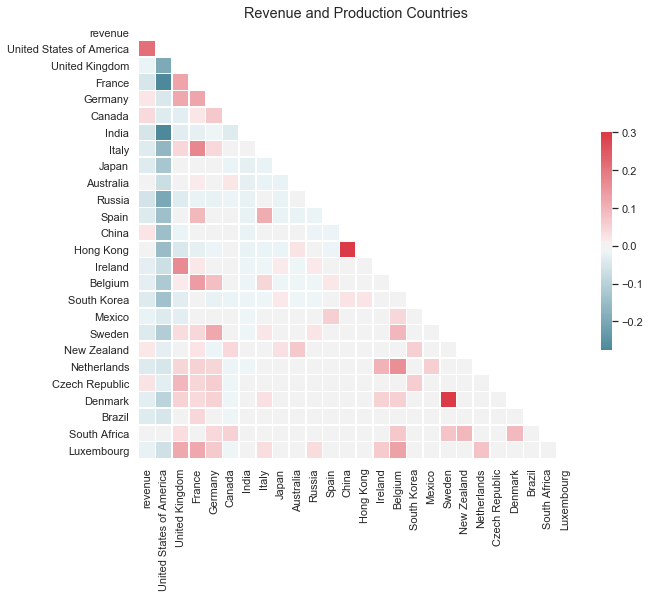

In [83]:
rev_country = pd.concat([train['revenue'], train[country_list]], axis = 1)
draw_heat_map(rev_country, 'Revenue and Production Countries')


Clear that only United States of America should be kept.

In [84]:
countries_to_keep = ['United States of America']

# Best Features from Actors

In [101]:
actors_rev = train.iloc[:,100:-6]
actors_rev['revenue'] = train.revenue

    

In [102]:
actors_rev

,Robert De Niro,Samuel L. Jackson,Morgan Freeman,Susan Sarandon,Liam Neeson,Bruce Willis,J.K. Simmons,Bruce McGill,John Turturro,Willem Dafoe,...,Alec Baldwin,William H. Macy,Christopher Plummer,Jim Broadbent,Christian Bale,Gene Hackman,James Franco,Christopher Walken,Brian Cox,revenue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12314651
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95149435
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3923970
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3261638
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85446075
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2586511
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34327391
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18750246
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117235147


In [107]:
train.keyword.value_counts()

0    2842
1      39
Name: keyword, dtype: int64

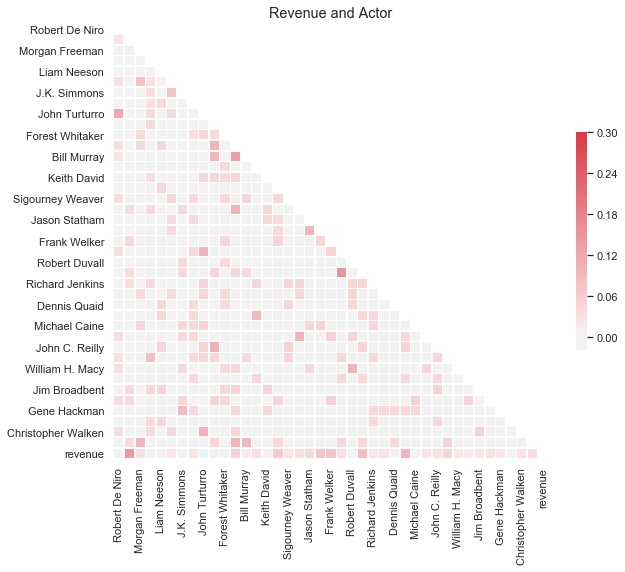

In [108]:

draw_heat_map(actors_rev, 'Revenue and Actor')

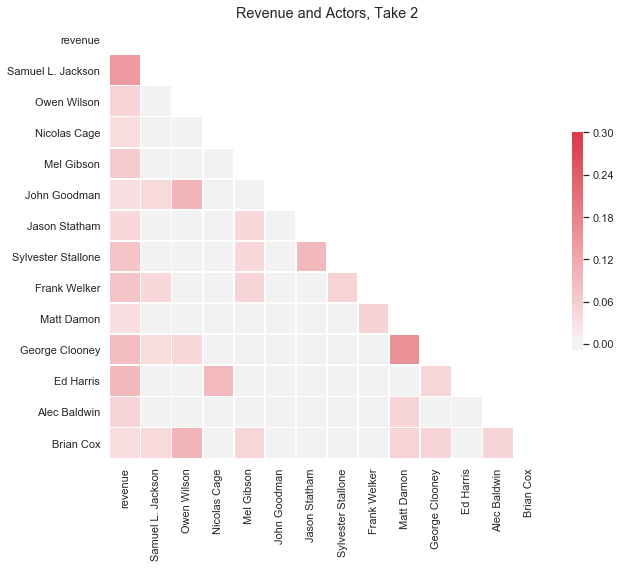

In [109]:
actor_threshold = 0.03

#List of actors to keep based on relationship strength to revenue
actors_to_keep = best_features(pd.concat([train['revenue'], train[actor_list]], axis = 1),
                               'revenue',
                              actor_threshold)

draw_heat_map(pd.concat([train['revenue'], train[actors_to_keep]], axis = 1), 
              'Revenue and Actors, Take 2')